In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/diabetes.csv', sep = ',')

In [ ]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Diabetes Manipulation

In [ ]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data_raw = diabetes.drop(['Pregnancies', 'Outcome'], axis = 1)

In [ ]:
# Replace 0 by nan
data_raw.replace(0, np.nan, inplace = True)

In [ ]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   763 non-null    float64
 1   BloodPressure             733 non-null    float64
 2   SkinThickness             541 non-null    float64
 3   Insulin                   394 non-null    float64
 4   BMI                       757 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 42.1 KB


In [ ]:
data_raw.isnull().sum().sort_values(ascending = False)

Insulin                     374
SkinThickness               227
BloodPressure                35
BMI                          11
Glucose                       5
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

#### Handling Missing Values

In [ ]:
# If data is continious replace by mean/median, if data is discrete replace by median or mode.
data_raw['Insulin'].unique()

array([ nan,  94., 168.,  88., 543., 846., 175., 230.,  83.,  96., 235.,
       146., 115., 140., 110., 245.,  54., 192., 207.,  70., 240.,  82.,
        36.,  23., 300., 342., 304., 142., 128.,  38., 100.,  90., 270.,
        71., 125., 176.,  48.,  64., 228.,  76., 220.,  40., 152.,  18.,
       135., 495.,  37.,  51.,  99., 145., 225.,  49.,  50.,  92., 325.,
        63., 284., 119., 204., 155., 485.,  53., 114., 105., 285., 156.,
        78., 130.,  55.,  58., 160., 210., 318.,  44., 190., 280.,  87.,
       271., 129., 120., 478.,  56.,  32., 744., 370.,  45., 194., 680.,
       402., 258., 375., 150.,  67.,  57., 116., 278., 122., 545.,  75.,
        74., 182., 360., 215., 184.,  42., 132., 148., 180., 205.,  85.,
       231.,  29.,  68.,  52., 255., 171.,  73., 108.,  43., 167., 249.,
       293.,  66., 465.,  89., 158.,  84.,  72.,  59.,  81., 196., 415.,
       275., 165., 579., 310.,  61., 474., 170., 277.,  60.,  14.,  95.,
       237., 191., 328., 250., 480., 265., 193.,  7

In [ ]:
np.round(data_raw['Insulin'].mean())

156.0

In [ ]:
data_raw['Insulin'].replace(np.nan, np.round(data_raw['Insulin'].mean()), inplace = True)

In [ ]:
data_raw.isnull().sum().sort_values(ascending = False)

SkinThickness               227
BloodPressure                35
BMI                          11
Glucose                       5
Insulin                       0
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

#### Simple Imputer 

In [ ]:
data_raw['SkinThickness'].unique()

array([35., 29., nan, 23., 32., 45., 19., 47., 38., 30., 41., 33., 26.,
       15., 36., 11., 31., 37., 42., 25., 18., 24., 39., 27., 21., 34.,
       10., 60., 13., 20., 22., 28., 54., 40., 51., 56., 14., 17., 50.,
       44., 12., 46., 16.,  7., 52., 43., 48.,  8., 49., 63., 99.])

In [ ]:
from sklearn.impute import SimpleImputer
# strategy = 'median', 'mean', 'most_frequent'
impute = SimpleImputer(strategy = 'median')
data_array = impute.fit_transform(data_raw)

In [ ]:
data_array 

array([[148.   ,  72.   ,  35.   , ...,  33.6  ,   0.627,  50.   ],
       [ 85.   ,  66.   ,  29.   , ...,  26.6  ,   0.351,  31.   ],
       [183.   ,  64.   ,  29.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [121.   ,  72.   ,  23.   , ...,  26.2  ,   0.245,  30.   ],
       [126.   ,  60.   ,  29.   , ...,  30.1  ,   0.349,  47.   ],
       [ 93.   ,  70.   ,  31.   , ...,  30.4  ,   0.315,  23.   ]])

In [ ]:
diabetes_df = pd.DataFrame(data_array, columns = data_raw.columns)

In [ ]:
diabetes_df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [ ]:
diabetes_df['Pregnancies'] = diabetes.Pregnancies
diabetes_df['Outcome'] = diabetes.Outcome

#### Data Augmentation
  * Regenerating new samples using bootstrapping method for biased samples.

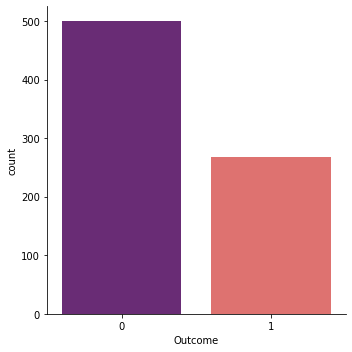

In [ ]:
sns.catplot(x = "Outcome", kind = 'count', data = diabetes_df, palette = 'magma')

In [ ]:
diabetes_df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
# Resample using "Bootstrapping" method to regenerate samples by upsampling for each class.
from sklearn.utils import resample
df_0 = diabetes_df[diabetes_df['Outcome'] == 0]
df_1 = diabetes_df[diabetes_df['Outcome'] == 1]

In [ ]:
# Apply Resampling 
df_1_upsample = resample(df_1, n_samples = 500, replace = True, random_state = 123)

In [ ]:
diabetes_df1 = pd.concat([df_0, df_1_upsample])

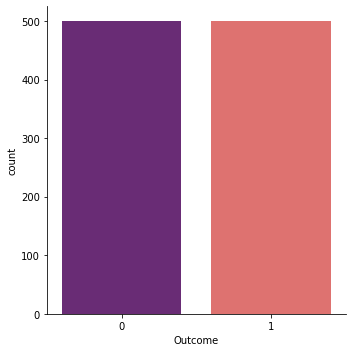

In [ ]:
sns.catplot(x = "Outcome", kind = 'count', data = diabetes_df1, palette = 'magma')

#### Correlation

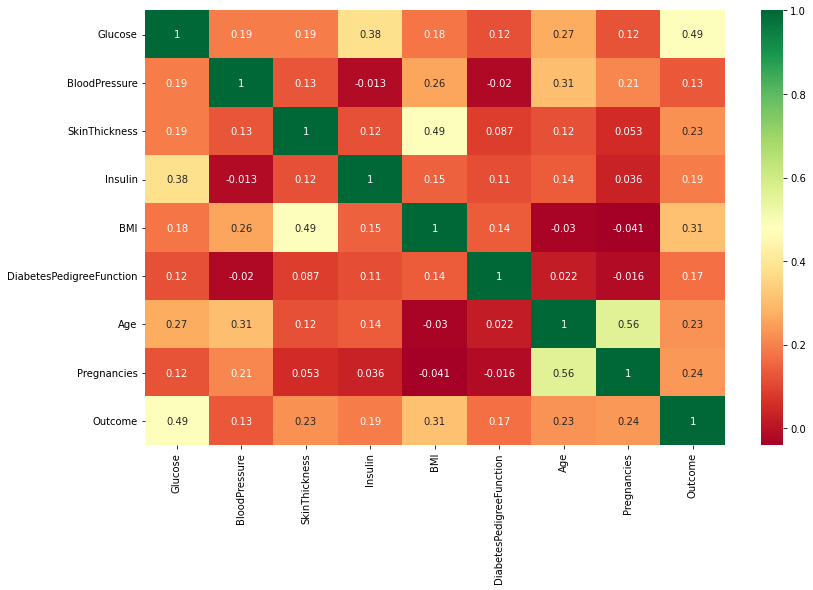

In [ ]:
plt.figure(figsize = (13,8))
sns.heatmap(diabetes_df1.corr(), annot = True, cmap = 'RdYlGn')

#### Data Pre-Processing

In [ ]:
X = diabetes_df1.drop(['Outcome'], axis = 1)
Y = diabetes_df1['Outcome']

In [ ]:
from sklearn.model_selection import train_test_split
# 0 - 11
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

In [ ]:
# Normalization the Features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
x_train_scaler = scaler.fit_transform(x_train)

In [ ]:
x_test_scaler = scaler.transform(x_test)

In [ ]:
x_test_scaler=x_test_scaler.reshape([200,2,4])
print(x_test_scaler.shape)

(200, 2, 4)


#### FeedForward NN

In [ ]:
from tensorflow.keras.layers import Dense, Dropout,Conv2D ,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
def build_model():
    # Sequential Neural Network - FeedForward NN
    model = Sequential()
    # Units = Num of Neurons (2 * pow(n)), input shape = num of features.
    model.add(Conv2D( 64, (1,1),activation = 'relu', input_shape =[2,4,1]))
    model.add(Dropout(0.2))
    # Hidden Layer - I
    model.add(Flatten())
    model.add(Dense(units = 128, activation = 'relu'))
    model.add(Dropout(0.2))
    # Hidden Layer - II
    model.add(Dense(units = 128, activation = 'relu'))
    model.add(Dropout(0.2))
    # Output Layer - Binary Class Classification
    model.add(Dense(units = 1, activation='sigmoid'))
    
    # Optimizers - To converge the loss
    optimizers = Adam(learning_rate = 0.001)

    # Model Compiler
    model.compile(loss = 'binary_crossentropy', optimizer = optimizers, metrics = ['accuracy'])
    return model

In [ ]:
model = build_model()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 2, 4, 64)          128       
                                                                 
 dropout (Dropout)           (None, 2, 4, 64)          0         
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 128)               65664     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0

In [ ]:
x_train_scaler=x_train_scaler.reshape([800,2,4])
print(x_test_scaler.shape)

(200, 2, 4)


In [ ]:
# epochs = Number of Iterations
# batch size = samples per steps in each epochs
history = model.fit(x_train_scaler, y_train, epochs = 350, batch_size = 20, validation_split = 0.2)

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.424287,0.815625,0.505528,0.79375
1,0.406787,0.804688,0.516220,0.80625
2,0.402955,0.810938,0.544065,0.77500
3,0.402655,0.815625,0.557215,0.75000
4,0.409654,0.815625,0.518796,0.80625
...,...,...,...,...
345,0.126991,0.935938,1.039717,0.82500
346,0.133276,0.937500,1.086642,0.83125
347,0.118121,0.950000,1.150992,0.82500
348,0.113606,0.959375,1.092491,0.80000


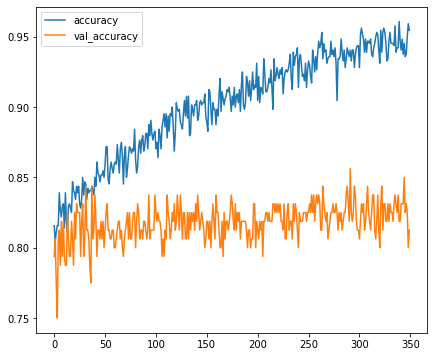

In [ ]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot(figsize = (7,6))

In [ ]:
model.evaluate(x_test_scaler, y_test)

7/7 [==============================] - 0s 6ms/step - loss: 0.9997 - accuracy: 0.7950


[0.9996600151062012, 0.7950000166893005]

#### Classification Metrics

In [ ]:
predict = model.predict(x_test_scaler)     # Predictions are in probability 

In [ ]:
yhat = np.round(predict)

In [ ]:
from sklearn.metrics import confusion_matrix
# matrix b/w true predictions and false prediction
confusion_matrix(y_test, yhat)

array([[72, 27],
       [14, 87]])

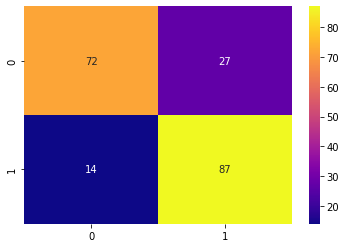

In [ ]:
sns.heatmap(confusion_matrix(y_test, yhat), annot = True, cmap = 'plasma')

#### Classification Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.84      0.73      0.78        99
           1       0.76      0.86      0.81       101

    accuracy                           0.80       200
   macro avg       0.80      0.79      0.79       200
weighted avg       0.80      0.80      0.79       200

